# 5.4.2 Hyperparameter Tuning with Cross-Validation

### Explanation of Hyperparameter Tuning with Cross-Validation

Hyperparameter tuning is the process of selecting the optimal hyperparameters for a machine learning model to improve its performance. Hyperparameters are the settings that control the training process of the model and are not learned from the data. Examples include the learning rate in gradient descent, the number of trees in a random forest, and the regularization parameter in logistic regression.

**Cross-validation is a technique used to assess the performance of a model by dividing the dataset into multiple subsets (folds)**. The model is trained on some of these subsets and tested on the remaining subsets, which helps in providing a more accurate estimate of the model's performance on unseen data.

Combining hyperparameter tuning with cross-validation allows for the evaluation of different hyperparameter settings by training and validating the model multiple times with different subsets of the data. This approach ensures that the selected hyperparameters generalize well to new data.

### Benefits and Importance of Hyperparameter Tuning

1. **Improved Model Performance**: Proper hyperparameter tuning can significantly enhance the accuracy, precision, and overall performance of the model.
2. **Generalization**: It helps in finding hyperparameters that generalize well to unseen data, reducing overfitting and underfitting.
3. **Model Robustness**: Well-tuned hyperparameters make the model more robust and reliable for making predictions.
4. **Optimized Resource Utilization**: Efficient hyperparameter tuning can save computational resources and time by avoiding the training of suboptimal models.

### Methods for Implementing Hyperparameter Tuning with Cross-Validation

There are several methods for hyperparameter tuning, including:

1. **Grid Search**: A brute-force approach where all possible combinations of hyperparameters are exhaustively searched.
2. **Random Search**: Random combinations of hyperparameters are sampled and evaluated, which can be more efficient than grid search.
3. **Bayesian Optimization**: A probabilistic model is used to select hyperparameters, aiming to find the optimal set more efficiently than grid or random search.
4. **Automated Machine Learning (AutoML)**: Automated frameworks that use advanced algorithms to perform hyperparameter tuning with minimal human intervention.


**Refer to: [Optimization>Hyperparameter_tuning](https://github.com/AdArya125/Machine-Learning---The-Journey/tree/main/3.%20Optimization/3.3%20Hyperparameter%20Tuning)**

These methods can be implemented using cross-validation to ensure the robustness and reliability of the selected hyperparameters.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load a dataset (e.g., Breast Cancer dataset)
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

In [4]:
# Define the hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [5]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters from Grid Search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [6]:
# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



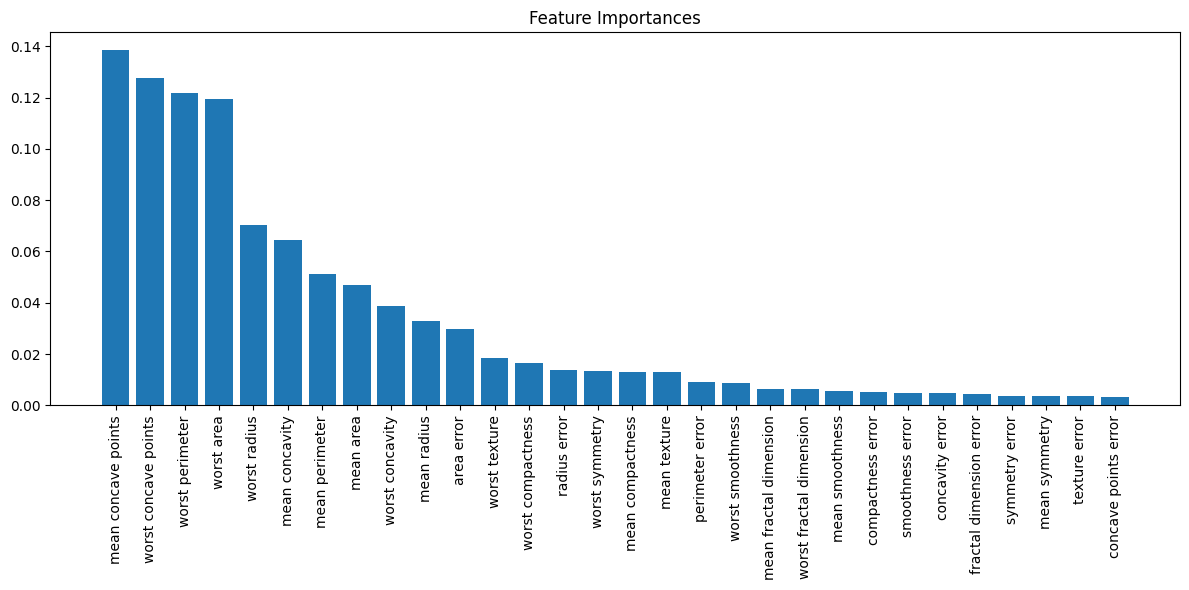

In [7]:
# Plot feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), data.feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

## Conclusion

Hyperparameter tuning with cross-validation is a crucial step in the machine learning pipeline. It ensures that the model is optimized for performance and generalizes well to unseen data. Methods such as grid search, random search, and Bayesian optimization can be effectively used in conjunction with cross-validation to find the best set of hyperparameters. This process not only improves model accuracy but also enhances its robustness and reliability. By carefully selecting and tuning hyperparameters, we can build models that perform better and provide more accurate predictions, leading to better decision-making and insights from the data.
